In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Finsihed loading libs')

Finsihed loading libs


Thirteen (13) clinical features:


age: age of the patient (years)

anaemia: decrease of red blood cells or hemoglobin (boolean)

high blood pressure: if the patient has hypertension (boolean)

creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)

diabetes: if the patient has diabetes (boolean)

ejection fraction: percentage of blood leaving the heart at each contraction (percentage)

platelets: platelets in the blood (kiloplatelets/mL)

sex: woman or man (binary)

serum creatinine: level of serum creatinine in the blood (mg/dL)

serum sodium: level of serum sodium in the blood (mEq/L)

smoking: if the patient smokes or not (boolean)

time: follow-up period (days)

[target] death event: if the patient deceased during the follow-up period (boolean)
 

In [ ]:
#read data
fileName = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_table(fileName, sep=',')
print(df.shape)
print(df.head())

(299, 13)
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1 

In [ ]:
#check the column names
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
#check the column types
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
#check any missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
sex1                        0
death                       0
dtype: int64

In [ ]:
#get the unique values for the feature "diabetes" and their counts and their proportions
df['diabetes'].unique()
df['diabetes'].value_counts(normalize=True)

0    0.58194
1    0.41806
Name: diabetes, dtype: float64

In [ ]:
#get the unique values for the feature "DEATH_EVENT" and their counts and their proportions
#Q: is there an issue with the proportions?
df['DEATH_EVENT'].unique()
df['DEATH_EVENT'].value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

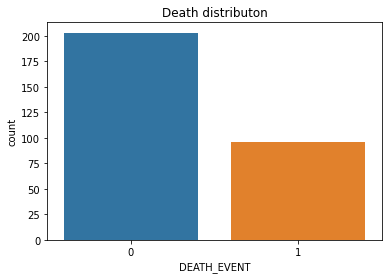

In [ ]:
#plot the number of DEATH_EVENTS by category
sns.countplot(x='DEATH_EVENT', data=df).set(title='Death distributon')
plt.show()

In [ ]:
#find the umber of unique values for each feature uisng the function nunique()
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
sex1                          2
death                         2
dtype: int64

In [ ]:
#Data summary statistics of all the variables
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
#store the continous variables into a list variable named continous_var
#variables are 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
#Q:how can you tell if a variable is categorical, numeric (discrete or continuous)? how can you do that programmatically?
contVars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
contVars

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium']

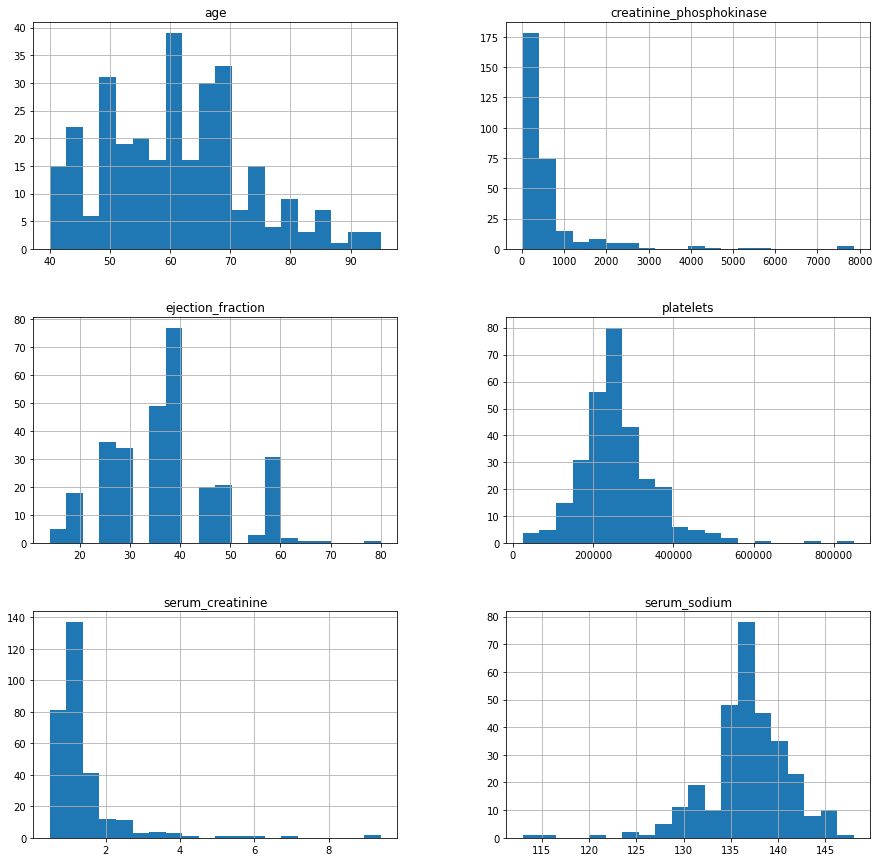

In [ ]:
#check the distribution of continuous variables
df[contVars].hist(bins=20,figsize=(15, 15))
plt.show()


In [ ]:
contVars

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium']

In [ ]:
#create a pairplot that will show the relationship between each of the continuous variables 
#with the rest of them. We will also use a different color for death events.
#you can use the same code form the link
#can you infer any relationships?
df['sex1'] = df['sex'].replace({1: "Male", 0: "Female"})
df['death'] = df['DEATH_EVENT'].replace({1: "yes", 0: "no"})

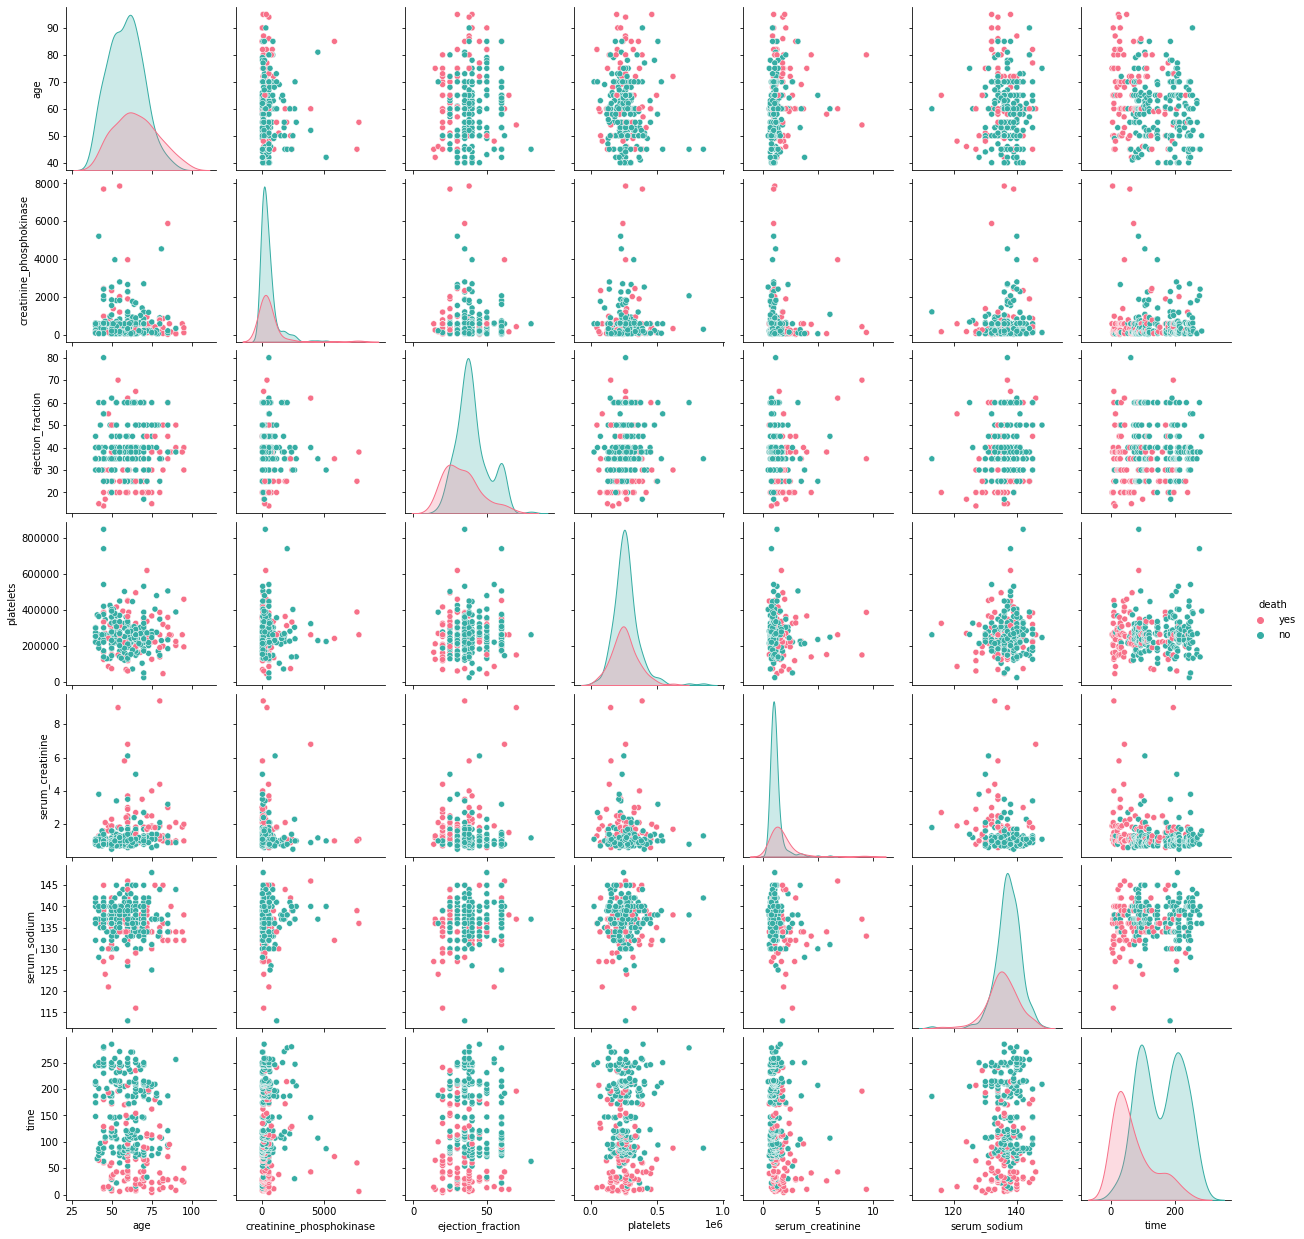

In [ ]:
sns.pairplot(df[['age',"creatinine_phosphokinase", "ejection_fraction",
                       "platelets", "serum_creatinine",
                       "serum_sodium", "time", "death"]], 
                       hue = "death", diag_kind='kde', kind='scatter', palette='husl')
plt.show()

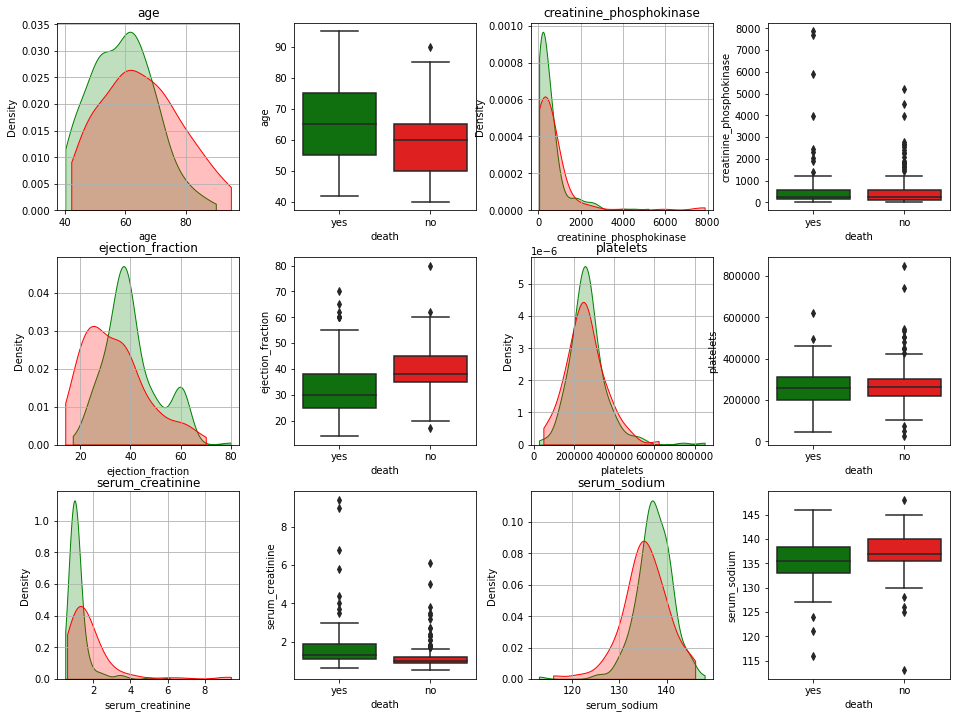

In [ ]:
#use boxplots to examine the cont variables and their relation to death
continous_var = ['age', 'creatinine_phosphokinase', 
    'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
plt.figure(figsize=(16, 25))
for i, col in enumerate(continous_var):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    
    sns.kdeplot(df.loc[df["death"]=='no', col], label="alive", color = "green", shade=True, cut=0)
    sns.kdeplot(df.loc[df["death"]=='yes', col], label="dead",  color = "red", shade=True, cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = df, x="death", palette = ["green", "red"])

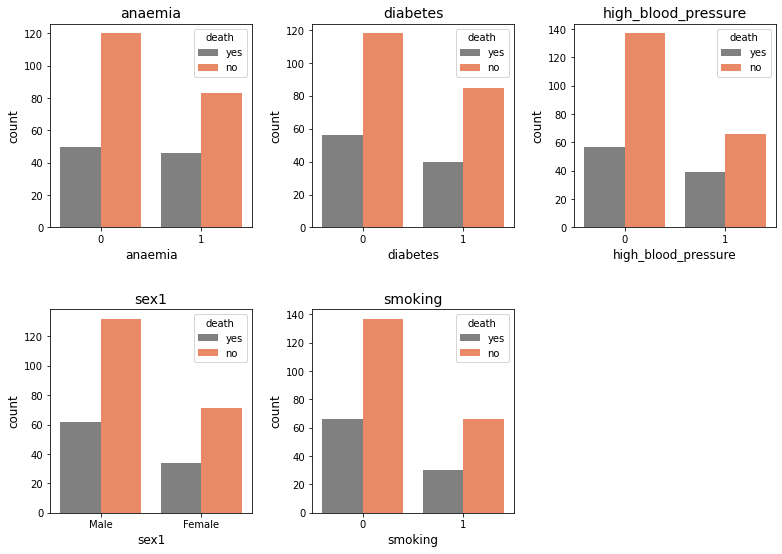

In [ ]:
#Other than the ‘death’ variable, we have five other categorical variables in this dataset. 
#It is worth examining their relationship with the ‘death’ variable. 
#use barplot or in the seaborn library, it is called the ‘countplot’ to do that.

binary_var = ['anaemia', 'diabetes', 'high_blood_pressure',
             'sex1', 'smoking']
plt.figure(figsize=(13, 9))
for i, var in enumerate(binary_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= df, x = var, hue="death", palette = ['gray', "coral"])